In [1]:
import MDAnalysis as md_analysis
import numpy
import matplotlib.pyplot as pyplot
import mpl_toolkits.mplot3d as mplot3d
import mpl_toolkits.mplot3d.art3d as art3d

## MDAnalysis Universe Class
* The MDAnalysis Universe class contains all the information describing the system.
* There are no required constructor arguments, but to generating a universe will generally require a topology file containing atomic information (in this case `./solvated_PEG.data`), and optionally an MD simulation trajactory/coordinate file (in this case `./solvated_PEG_dump.lammpstrj`)
* However, some topology files can contain both atomic information **and** coordinate data (e.g. XYZ, PDB, GRO or CRD files)
* Additionally, any file you provide you need to add an additional constructor argument for the file format

In [2]:
md_universe: md_analysis.Universe = md_analysis.Universe(
    "../data/raw/topology/solvated_PEG.data", 
    "../data/raw/trajectory/solvated_PEG_dump.lammpstrj", 
    topology_format = "data",
    format = "lammpsdump"
)

# MD Analysis Universe.select_atoms and AtomGroup Class
* The method `Universe.select_atoms` returns an AtomGroup object
* The AtomGroup class is essentially an ordered array of atoms, with their order reflecting their order defined in the molecular topology file
* It therefore supports looping, indexing & slicing like a standard Python list
* Additionally, the class has properties representing coordinates, velocities, masses, charges, atom names, residues etc
* It also has methods for calculating properties such as distances, angles, dihedrals, center of mass, as well as methods for atomic transformation & manipulation such as translation, rotation etc

In [3]:
peg_molecule = md_universe.select_atoms("type 1 2 3 4 5 6 7")
h2o_molecule = md_universe.select_atoms("type 8 9")

print("Atoms in PEG molecule:", peg_molecule.atoms.n_atoms)
print("Atoms in H2O molecule:", h2o_molecule.atoms.n_atoms)

Atoms in PEG molecule: 101
Atoms in H2O molecule: 2991


In [4]:
for atom in peg_molecule[:6]:
    atom_id: int = atom.id
    atom_type: str = atom.type
    atomic_mass: float = atom.mass
    atomic_charge: float = numpy.round(atom.charge, 2)
    print("Atom ID:", atom_id, "|", 
          "Atom Type:", atom_type, "|", 
          "Atomic Mass:", atomic_mass, "g/mol | Atomic Charge:", atomic_charge, "e")

Atom ID: 3151 | Atom Type: 4 | Atomic Mass: 1.008 g/mol | Atomic Charge: 0.21 e
Atom ID: 3152 | Atom Type: 6 | Atomic Mass: 15.9994 g/mol | Atomic Charge: -0.33 e
Atom ID: 3153 | Atom Type: 5 | Atomic Mass: 12.011 g/mol | Atomic Charge: -0.02 e
Atom ID: 3154 | Atom Type: 3 | Atomic Mass: 1.008 g/mol | Atomic Charge: 0.09 e
Atom ID: 3155 | Atom Type: 3 | Atomic Mass: 1.008 g/mol | Atomic Charge: 0.09 e
Atom ID: 3156 | Atom Type: 2 | Atomic Mass: 12.011 g/mol | Atomic Charge: -0.06 e


# Extract Temporal Evolution of Hydrogen Type 4 Atom (First Atom in PEG Group)
* We will now extract the position of the first atom of the peg group (i.e. the hydrogen type 4 atom), over all 300 frames, and store its coordinates in each timestep frame into a list
* We will then use Matplotlib Pyplot to visualise the x and y coordinates occupied by the hydrogen type 4 atom during the equilibration simulation via a 2D scatter graph
* We will also use Matplotlib Pyplot to visualise the x, y & z coordinates and timestep frame via a 3D scatter graph

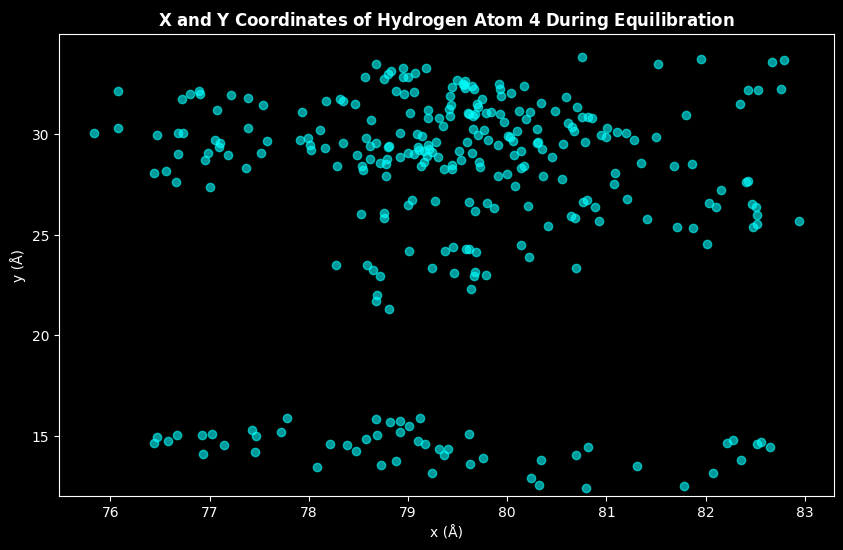

In [5]:
hydrogen_atom_4: md_analysis.AtomGroup = peg_molecule[0]
position_vs_time: list = []
scatter_plot_size: list = []

for timestep in md_universe.trajectory:
    x, y, z = hydrogen_atom_4.position
    position_vs_time.append({'timestep': timestep.frame, 'x': x, 'y': y, 'z': z})  # timestep.frame is the ID of the timestep frame

# Extract timestep frames and x, y & z coordinates
timestep_frames: list = [position['timestep'] for position in position_vs_time]
x_coordinates: list = [position['x'] for position in position_vs_time]
y_coordinates: list = [position['y'] for position in position_vs_time]
z_coordinates: list = [position['z'] for position in position_vs_time]

# Create graph
two_dimension_figure, two_dimension_axes = pyplot.subplots(figsize=(10, 6))

# Stylise & plot the x and y coordinates using Matplotlib
two_dimension_figure.patch.set_facecolor('black')
two_dimension_axes.set_facecolor('black')
two_dimension_axes.scatter(x_coordinates, y_coordinates, c='cyan', marker='o', alpha=0.6)
two_dimension_axes.set_ylim(12, two_dimension_axes.get_ylim()[1])

# Set titles and labels
pyplot.title(r'$\bf{X\ and\ Y\ Coordinates\ of\ Hydrogen\ Atom\ 4\ During\ Equilibration}$', color='white')
pyplot.xlabel('x (Å)', color='white')
pyplot.ylabel('y (Å)', color='white')
two_dimension_axes.tick_params(colors='white', which='both')

# Stylise spines
for spine in two_dimension_axes.spines.values():
    spine.set_edgecolor('white')
    
# Save & show the plot
pyplot.savefig('../reports/figures/two_dimensional_H_atom_four_temporal_evolution.png')
pyplot.show()

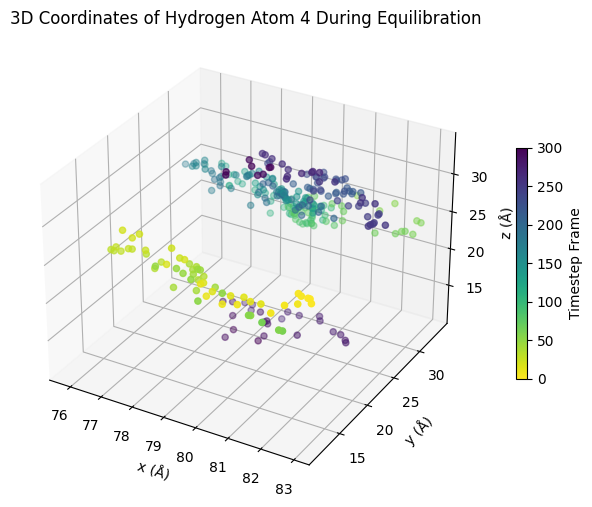

In [6]:
three_dimension_figure: pyplot.Figure = pyplot.figure(figsize=(10, 6))
three_dimension_axes: mplot3d.Axes3D = three_dimension_figure.add_subplot(111, projection='3d')

three_dimension_scatter: art3d.Path3DCollection = three_dimension_axes.scatter(
    x_coordinates, 
    y_coordinates, 
    z_coordinates, 
    c=timestep_frames, 
    cmap='viridis_r', 
    marker='o'
)

# Add color bar to show frame mapping
colour_bar: pyplot.colorbar = pyplot.colorbar(three_dimension_scatter, ax=three_dimension_axes, shrink=0.5)
colour_bar.set_label('Timestep Frame')

# Set titles and labels
three_dimension_axes.set_title('3D Coordinates of Hydrogen Atom 4 During Equilibration')
three_dimension_axes.set_xlabel('x (Å)')
three_dimension_axes.set_ylabel('y (Å)')
three_dimension_axes.set_zlabel('z (Å)')

# Save & show the plot
pyplot.savefig('../reports/figures/three_dimensional_H_atom_four_temporal_evolution.png')
pyplot.show()